In [ ]:
#ETUDE EVOLUTION PRIX DES BILLETS D'AVION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importation

In [216]:
#On récupère tous les résultats pour les billets d'avion scrapés
df = pd.read_csv("D:/ESILV/Année 5/Web Scraping/Projet/Avion_dataset_final_corrige.csv", sep = ";", encoding = "latin-1")

In [217]:
df.head()

,Ville_depart,Ville_arrivee,Date_depart,Nb_passagers,Horaire_depart,Horaire_arrivee,Aeroport_depart,Aeroport_arrivee,Compagnie,Duree,Escale,Prix,Releve_annee,Releve_mois,Releve_jour,Releve_heure
0,Bordeaux,Lyon,06/02/2023,1,08:55:00,10:10:00,Merignac (BOD),Saint Exupery (LYS),Easyjet,1 h 15,direct,89.80,2023,1,11,16
1,Bordeaux,Lyon,06/02/2023,1,06:05:00,07:15:00,Merignac (BOD),Saint Exupery (LYS),Air France,1 h 10,direct,135.84,2023,1,11,16
2,Bordeaux,Lyon,06/02/2023,1,07:00:00,08:15:00,Merignac (BOD),Saint Exupery (LYS),Easyjet,1 h 15,direct,69.96,2023,1,11,16
3,Bordeaux,Lyon,06/02/2023,1,20:45:00,21:55:00,Merignac (BOD),Saint Exupery (LYS),Easyjet,1 h 10,direct,68.10,2023,1,11,16
4,Bordeaux,Lyon,06/02/2023,1,18:35:00,19:50:00,Merignac (BOD),Saint Exupery (LYS),Air France,1 h 15,direct,163.25,2023,1,11,16


In [109]:
len(df)

31987

In [218]:
# On crée un dataframe pour récupérer les billets par trajet 
# Paris-Lyon
# Paris-Stuttgart
# Paris-Budapest
# Bordeaux-Lyon
# Lyon-Marseille

df_paris_lyon = df[(df["Ville_depart"] == "Paris") &  (df["Ville_arrivee"] == "Lyon")]
df_paris_stuttgart = df[(df["Ville_depart"] == "Paris") &  (df["Ville_arrivee"] == "Stuttgart")]
df_paris_budapest = df[(df["Ville_depart"] == "Paris") &  (df["Ville_arrivee"] == "Budapest")]
df_bordeaux_lyon = df[(df["Ville_depart"] == "Bordeaux") &  (df["Ville_arrivee"] == "Lyon")]
df_lyon_marseille = df[(df["Ville_depart"] == "Lyon") &  (df["Ville_arrivee"] == "Marseille")]

In [219]:
df_paris_lyon.reset_index(drop = True, inplace = True)
df_paris_stuttgart.reset_index(drop = True, inplace = True)
df_paris_budapest.reset_index(drop = True, inplace = True)
df_bordeaux_lyon.reset_index(drop = True, inplace = True)
df_lyon_marseille.reset_index(drop = True, inplace = True)

In [220]:
# Fonctions pour étudier l'évolution des prix des billets

# Moyenne prix par jour
def Moyenne_prix_par_jour(df):
    df_mean = df.loc[:,["Releve_annee", "Releve_mois", "Releve_jour", "Prix"]].groupby(["Releve_annee", "Releve_mois", "Releve_jour"])["Prix"].mean().reset_index()
    df_mean.rename(columns = {'Prix':'Prix_moyen_jour'}, inplace = True)
    return df_mean


# Moyenne prix par heure et par jour
def Moyenne_prix_par_jour_heure(df):
    df_mean = df.loc[:,["Releve_annee", "Releve_mois", "Releve_jour", "Releve_heure", "Prix"]].groupby(["Releve_annee", "Releve_mois", "Releve_jour", "Releve_heure"])["Prix"].mean().reset_index()
    df_mean.rename(columns = {'Prix':'Prix_moyen_jour_heure'}, inplace = True)
    return df_mean


# Moyenne prix par heure
def Moyenne_prix_par_heure(df):
    df_mean = df.loc[:,["Releve_annee", "Releve_mois", "Releve_heure", "Prix"]].groupby(["Releve_annee", "Releve_mois", "Releve_heure"])["Prix"].mean().reset_index()
    df_mean.rename(columns = {'Prix':'Prix_moyen_heure'}, inplace = True)
    return df_mean

In [262]:
def Plot_mean_day(df):
    plt.plot(df['Releve_jour'], df['Prix_moyen_jour'])
    plt.title('Evolution du prix moyen du billet')
    plt.xlabel('Jour du relevé (mois de janvier)')
    plt.ylabel('Prix moyen billet')
    plt.show()


def Plot_mean_hour(df):
    plt.plot(df['Releve_heure'], df['Prix_moyen_heure'])
    plt.title('Evolution du prix moyen du billet')
    plt.xlabel('Heure du relevé')
    plt.ylabel('Prix moyen billet')
    plt.show()

In [ ]:
# ETUDE sur PARIS-LYON

In [221]:
df_paris_lyon.head()

,Ville_depart,Ville_arrivee,Date_depart,Nb_passagers,Horaire_depart,Horaire_arrivee,Aeroport_depart,Aeroport_arrivee,Compagnie,Duree,Escale,Prix,Releve_annee,Releve_mois,Releve_jour,Releve_heure
0,Paris,Lyon,06/02/2023,1,11:45:00,12:50:00,Charles De Gaulle (CDG),Saint Exupery (LYS),Air France,1 h 05,direct,132.68,2023,1,11,17
1,Paris,Lyon,06/02/2023,1,16:25:00,17:35:00,Charles De Gaulle (CDG),Saint Exupery (LYS),Air France,1 h 10,direct,132.30,2023,1,11,17
2,Paris,Lyon,06/02/2023,1,09:15:00,10:25:00,Charles De Gaulle (CDG),Saint Exupery (LYS),Air France,1 h 10,direct,132.68,2023,1,11,17
3,Paris,Lyon,06/02/2023,1,08:40:00,09:45:00,Charles De Gaulle (CDG),Saint Exupery (LYS),Air France,1 h 05,direct,132.68,2023,1,11,17
4,Paris,Lyon,06/02/2023,1,22:10:00,23:20:00,Charles De Gaulle (CDG),Saint Exupery (LYS),Air France,1 h 10,direct,132.68,2023,1,11,17


In [222]:
# Moyenne prix par jour
df_paris_lyon_mean_jour = Moyenne_prix_par_jour(df_paris_lyon)
df_paris_lyon_mean_jour

,Releve_annee,Releve_mois,Releve_jour,Prix_moyen_jour
0,2023,1,4,221.360967
1,2023,1,5,268.860111
2,2023,1,6,258.697694
3,2023,1,7,225.841827
4,2023,1,8,223.972756
5,2023,1,9,272.942090
6,2023,1,10,237.862837
7,2023,1,11,230.374170
8,2023,1,12,252.698185
9,2023,1,13,257.022746


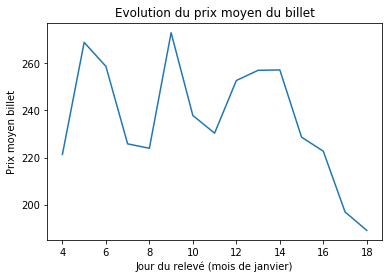

In [263]:
Plot_mean_day(df_paris_lyon_mean_jour)

In [224]:
# Moyenne prix par heure
df_paris_lyon_mean_heure = Moyenne_prix_par_heure(df_paris_lyon)
df_paris_lyon_mean_heure.head(10)

,Releve_annee,Releve_mois,Releve_heure,Prix_moyen_heure
0,2023,1,0,242.737085
1,2023,1,1,235.958263
2,2023,1,2,229.463667
3,2023,1,9,193.643333
4,2023,1,10,244.326563
5,2023,1,11,232.153342
6,2023,1,12,234.341278
7,2023,1,13,234.897227
8,2023,1,14,232.090024
9,2023,1,15,230.332813


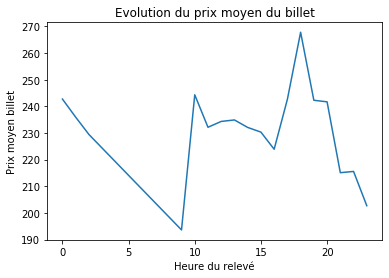

In [264]:
Plot_mean_hour(df_paris_lyon_mean_heure)

In [226]:
# Moyenne prix par jour et par heure
df_paris_lyon_mean_jour_heure = Moyenne_prix_par_jour_heure(df_paris_lyon)
df_paris_lyon_mean_jour_heure.head(10)

,Releve_annee,Releve_mois,Releve_jour,Releve_heure,Prix_moyen_jour_heure
0,2023,1,4,0,175.438667
1,2023,1,4,1,169.750000
2,2023,1,4,10,165.976333
3,2023,1,4,11,183.617000
4,2023,1,4,12,183.773333
5,2023,1,4,13,183.492333
6,2023,1,4,14,182.319000
7,2023,1,4,15,182.021000
8,2023,1,4,16,185.709667
9,2023,1,4,17,207.789667


In [ ]:
# ETUDE sur PARIS-STUTTGART

In [227]:
df_paris_stuttgart.head()

,Ville_depart,Ville_arrivee,Date_depart,Nb_passagers,Horaire_depart,Horaire_arrivee,Aeroport_depart,Aeroport_arrivee,Compagnie,Duree,Escale,Prix,Releve_annee,Releve_mois,Releve_jour,Releve_heure
0,Paris,Stuttgart,06/02/2023,1,09:35:00,10:50:00,Charles De Gaulle (CDG),Echterdingen (STR),Air France,1 h 15,direct,145.90,2023,1,15,23
1,Paris,Stuttgart,06/02/2023,1,20:50:00,22:05:00,Charles De Gaulle (CDG),Echterdingen (STR),Air France,1 h 15,direct,145.90,2023,1,15,23
2,Paris,Stuttgart,06/02/2023,1,08:30:00,13:55:00,Charles De Gaulle (CDG),Echterdingen (STR),Lufthansa,5 h 25,1 escale,133.80,2023,1,15,23
3,Paris,Stuttgart,06/02/2023,1,10:20:00,13:55:00,Charles De Gaulle (CDG),Echterdingen (STR),Lufthansa,3 h 35,1 escale,150.17,2023,1,15,23
4,Paris,Stuttgart,06/02/2023,1,09:10:00,13:20:00,Charles De Gaulle (CDG),Echterdingen (STR),Lufthansa,4 h 10,1 escale,141.60,2023,1,15,23


In [228]:
# Moyenne prix par jour
df_paris_stuttgart_mean_jour = Moyenne_prix_par_jour(df_paris_stuttgart)
df_paris_stuttgart_mean_jour.head(10)

,Releve_annee,Releve_mois,Releve_jour,Prix_moyen_jour
0,2023,1,4,173.974354
1,2023,1,5,215.805021
2,2023,1,6,223.832756
3,2023,1,7,213.918168
4,2023,1,8,197.727896
5,2023,1,9,191.757103
6,2023,1,10,185.667103
7,2023,1,11,178.878347
8,2023,1,12,221.756595
9,2023,1,13,237.942100


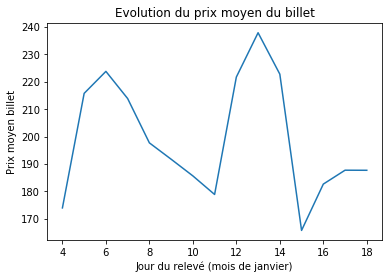

In [265]:
Plot_mean_day(df_paris_stuttgart_mean_jour)

In [230]:
# Moyenne prix par heure
df_paris_stuttgart_mean_heure = Moyenne_prix_par_heure(df_paris_stuttgart)
df_paris_stuttgart_mean_heure.head(10)

,Releve_annee,Releve_mois,Releve_heure,Prix_moyen_heure
0,2023,1,0,199.446100
1,2023,1,1,198.192541
2,2023,1,2,200.340800
3,2023,1,9,189.832167
4,2023,1,10,206.598359
5,2023,1,11,199.816436
6,2023,1,12,204.765452
7,2023,1,13,204.109545
8,2023,1,14,202.790415
9,2023,1,15,197.500727


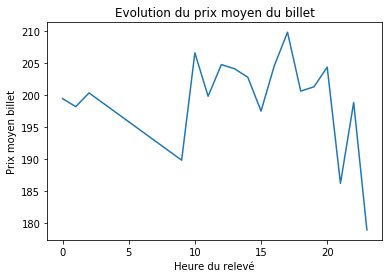

In [266]:
Plot_mean_hour(df_paris_stuttgart_mean_heure)

In [232]:
# Moyenne prix par jour et par heure
df_paris_stuttgart_mean_jour_heure = Moyenne_prix_par_jour_heure(df_paris_stuttgart)
df_paris_stuttgart_mean_jour_heure.head(10)

,Releve_annee,Releve_mois,Releve_jour,Releve_heure,Prix_moyen_jour_heure
0,2023,1,4,0,165.113333
1,2023,1,4,10,161.888000
2,2023,1,4,11,159.596667
3,2023,1,4,12,159.797667
4,2023,1,4,13,159.323000
5,2023,1,4,14,153.350385
6,2023,1,4,15,160.793000
7,2023,1,4,16,162.625517
8,2023,1,4,17,186.448276
9,2023,1,4,18,192.958000


In [ ]:
# ETUDE sur PARIS-BUDAPEST

In [233]:
df_paris_budapest.head()

,Ville_depart,Ville_arrivee,Date_depart,Nb_passagers,Horaire_depart,Horaire_arrivee,Aeroport_depart,Aeroport_arrivee,Compagnie,Duree,Escale,Prix,Releve_annee,Releve_mois,Releve_jour,Releve_heure
0,Paris,Budapest,06/02/2023,1,09:05:00,11:15:00,Orly (ORY),Ferihegy (BUD),Wizz Air,2 h 10,direct,97.02,2023,1,13,10
1,Paris,Budapest,06/02/2023,1,12:45:00,21:40:00,Paris Beauvais (BVA),Ferihegy (BUD),Ryanair,8 h 55,1 escale,44.11,2023,1,13,10
2,Paris,Budapest,06/02/2023,1,21:45:00,23:55:00,Paris Beauvais (BVA),Ferihegy (BUD),Ryanair,2 h 10,direct,71.11,2023,1,13,10
3,Paris,Budapest,06/02/2023,1,20:55:00,23:10:00,Charles De Gaulle (CDG),Ferihegy (BUD),Air France,2 h 15,direct,215.29,2023,1,13,10
4,Paris,Budapest,06/02/2023,1,18:50:00,22:20:00,Charles De Gaulle (CDG),Ferihegy (BUD),Lufthansa,3 h 30,1 escale,151.04,2023,1,13,10


In [234]:
# Moyenne prix par jour
df_paris_budapest_mean_jour = Moyenne_prix_par_jour(df_paris_budapest)
df_paris_budapest_mean_jour.head(10)

,Releve_annee,Releve_mois,Releve_jour,Prix_moyen_jour
0,2023,1,4,155.846417
1,2023,1,5,174.091838
2,2023,1,6,195.273313
3,2023,1,7,199.407114
4,2023,1,8,203.573778
5,2023,1,9,198.213976
6,2023,1,10,185.716229
7,2023,1,11,173.593486
8,2023,1,12,201.183606
9,2023,1,13,195.837432


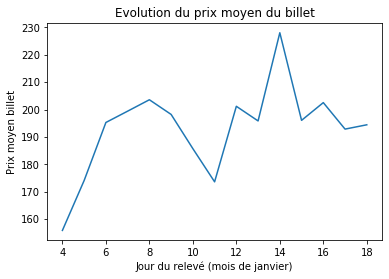

In [267]:
Plot_mean_day(df_paris_budapest_mean_jour)

In [236]:
# Moyenne prix par heure
df_paris_budapest_mean_heure = Moyenne_prix_par_heure(df_paris_budapest)
df_paris_budapest_mean_heure.head(10)

,Releve_annee,Releve_mois,Releve_heure,Prix_moyen_heure
0,2023,1,0,184.943677
1,2023,1,1,183.585452
2,2023,1,2,213.748667
3,2023,1,9,188.973333
4,2023,1,10,196.279369
5,2023,1,11,196.634067
6,2023,1,12,196.842406
7,2023,1,13,191.736205
8,2023,1,14,191.545533
9,2023,1,15,186.481203


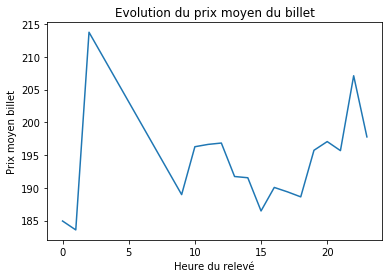

In [268]:
Plot_mean_hour(df_paris_budapest_mean_heure)

In [238]:
# Moyenne prix par jour et par heure
df_paris_budapest_mean_jour_heure = Moyenne_prix_par_jour_heure(df_paris_budapest)
df_paris_budapest_mean_jour_heure.head(10)

,Releve_annee,Releve_mois,Releve_jour,Releve_heure,Prix_moyen_jour_heure
0,2023,1,4,0,150.314667
1,2023,1,4,1,150.592667
2,2023,1,4,10,130.317333
3,2023,1,4,12,185.192000
4,2023,1,4,13,148.414333
5,2023,1,4,14,141.892333
6,2023,1,4,15,146.620000
7,2023,1,4,16,147.491333
8,2023,1,4,17,153.807333
9,2023,1,4,18,163.183333


In [ ]:
# ETUDE sur BORDEAUX-LYON

In [239]:
df_bordeaux_lyon.head()

,Ville_depart,Ville_arrivee,Date_depart,Nb_passagers,Horaire_depart,Horaire_arrivee,Aeroport_depart,Aeroport_arrivee,Compagnie,Duree,Escale,Prix,Releve_annee,Releve_mois,Releve_jour,Releve_heure
0,Bordeaux,Lyon,06/02/2023,1,08:55:00,10:10:00,Merignac (BOD),Saint Exupery (LYS),Easyjet,1 h 15,direct,89.80,2023,1,11,16
1,Bordeaux,Lyon,06/02/2023,1,06:05:00,07:15:00,Merignac (BOD),Saint Exupery (LYS),Air France,1 h 10,direct,135.84,2023,1,11,16
2,Bordeaux,Lyon,06/02/2023,1,07:00:00,08:15:00,Merignac (BOD),Saint Exupery (LYS),Easyjet,1 h 15,direct,69.96,2023,1,11,16
3,Bordeaux,Lyon,06/02/2023,1,20:45:00,21:55:00,Merignac (BOD),Saint Exupery (LYS),Easyjet,1 h 10,direct,68.10,2023,1,11,16
4,Bordeaux,Lyon,06/02/2023,1,18:35:00,19:50:00,Merignac (BOD),Saint Exupery (LYS),Air France,1 h 15,direct,163.25,2023,1,11,16


In [240]:
# Moyenne prix par jour
df_bordeaux_lyon_mean_jour = Moyenne_prix_par_jour(df_bordeaux_lyon)
df_bordeaux_lyon_mean_jour.head(10)

,Releve_annee,Releve_mois,Releve_jour,Prix_moyen_jour
0,2023,1,4,158.784383
1,2023,1,5,239.844375
2,2023,1,6,231.720522
3,2023,1,7,252.666387
4,2023,1,8,246.306481
5,2023,1,9,276.437017
6,2023,1,10,290.898499
7,2023,1,11,257.146682
8,2023,1,12,245.119915
9,2023,1,13,315.165680


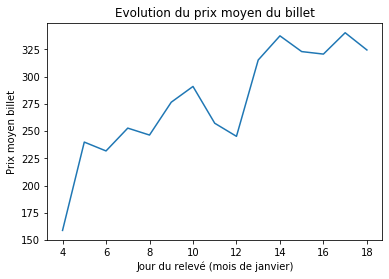

In [271]:
Plot_mean_day(df_bordeaux_lyon_mean_jour)

In [242]:
# Moyenne prix par heure
df_bordeaux_lyon_mean_heure = Moyenne_prix_par_heure(df_bordeaux_lyon)
df_bordeaux_lyon_mean_heure.head(10)

,Releve_annee,Releve_mois,Releve_heure,Prix_moyen_heure
0,2023,1,0,287.673713
1,2023,1,1,246.339265
2,2023,1,2,321.756667
3,2023,1,9,320.275254
4,2023,1,10,245.426602
5,2023,1,11,265.117968
6,2023,1,12,270.573623
7,2023,1,13,271.369380
8,2023,1,14,266.626895
9,2023,1,15,272.662695


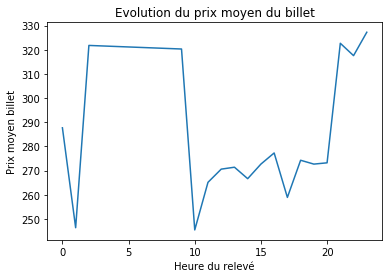

In [270]:
Plot_mean_hour(df_bordeaux_lyon_mean_heure)

In [244]:
# Moyenne prix par jour et par heure
df_bordeaux_lyon_mean_jour_heure = Moyenne_prix_par_jour_heure(df_bordeaux_lyon)
df_bordeaux_lyon_mean_jour_heure.head(10)

,Releve_annee,Releve_mois,Releve_jour,Releve_heure,Prix_moyen_jour_heure
0,2023,1,4,0,155.051923
1,2023,1,4,1,155.344231
2,2023,1,4,10,150.447692
3,2023,1,4,11,151.452692
4,2023,1,4,12,155.128462
5,2023,1,4,13,150.880769
6,2023,1,4,14,144.800769
7,2023,1,4,15,149.170385
8,2023,1,4,16,149.680385
9,2023,1,4,17,160.779821


In [ ]:
# ETUDE sur LYON-MARSEILLE

In [245]:
df_lyon_marseille.head()

,Ville_depart,Ville_arrivee,Date_depart,Nb_passagers,Horaire_depart,Horaire_arrivee,Aeroport_depart,Aeroport_arrivee,Compagnie,Duree,Escale,Prix,Releve_annee,Releve_mois,Releve_jour,Releve_heure
0,Lyon,Marseille,06/02/2023,1,20:50:00,21:45:00,Saint Exupery (LYS),Marseille-Provele (MRS),Air France,0 h 55,direct,140.15,2023,1,15,18
1,Lyon,Marseille,06/02/2023,1,08:20:00,09:15:00,Saint Exupery (LYS),Marseille-Provele (MRS),Air France,0 h 55,direct,201.90,2023,1,15,18
2,Lyon,Marseille,06/02/2023,1,07:15:00,13:20:00,Saint Exupery (LYS),Marseille-Provele (MRS),Différentes compagnies,6 h 05,1 escale,98.50,2023,1,15,18
3,Lyon,Marseille,06/02/2023,1,08:45:00,13:20:00,Saint Exupery (LYS),Marseille-Provele (MRS),Différentes compagnies,4 h 35,1 escale,121.56,2023,1,15,18
4,Lyon,Marseille,06/02/2023,1,15:05:00,19:55:00,Saint Exupery (LYS),Marseille-Provele (MRS),Différentes compagnies,4 h 50,1 escale,122.74,2023,1,15,18


In [246]:
# Moyenne prix par jour
df_lyon_marseille_mean_jour = Moyenne_prix_par_jour(df_lyon_marseille)
df_lyon_marseille_mean_jour.head(10)

,Releve_annee,Releve_mois,Releve_jour,Prix_moyen_jour
0,2023,1,4,314.448374
1,2023,1,5,283.055941
2,2023,1,6,228.373417
3,2023,1,7,245.421644
4,2023,1,8,296.429386
5,2023,1,9,257.544027
6,2023,1,10,266.655000
7,2023,1,11,330.342840
8,2023,1,12,295.209009
9,2023,1,13,279.772549


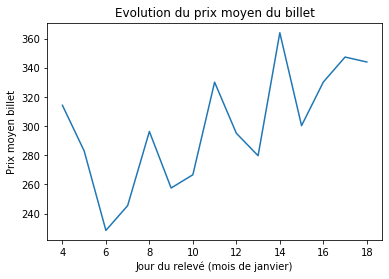

In [272]:
Plot_mean_day(df_lyon_marseille_mean_jour)

In [248]:
# Moyenne prix par heure
df_lyon_marseille_mean_heure = Moyenne_prix_par_heure(df_lyon_marseille)
df_lyon_marseille_mean_heure.head(10)

,Releve_annee,Releve_mois,Releve_heure,Prix_moyen_heure
0,2023,1,0,288.683848
1,2023,1,1,272.866487
2,2023,1,2,320.261852
3,2023,1,9,366.311071
4,2023,1,10,294.213951
5,2023,1,11,286.483995
6,2023,1,12,292.014840
7,2023,1,13,285.984788
8,2023,1,14,280.497348
9,2023,1,15,286.318621


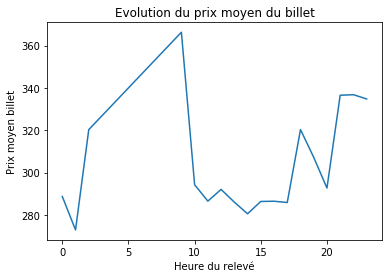

In [273]:
Plot_mean_hour(df_lyon_marseille_mean_heure)

In [250]:
# Moyenne prix par jour et par heure
df_lyon_marseille_mean_jour_heure = Moyenne_prix_par_jour_heure(df_lyon_marseille)
df_lyon_marseille_mean_jour_heure.head(10)

,Releve_annee,Releve_mois,Releve_jour,Releve_heure,Prix_moyen_jour_heure
0,2023,1,4,0,300.602593
1,2023,1,4,1,318.916400
2,2023,1,4,10,318.715517
3,2023,1,4,11,332.306296
4,2023,1,4,12,314.448966
5,2023,1,4,13,314.017586
6,2023,1,4,14,307.327241
7,2023,1,4,15,312.160345
8,2023,1,4,16,313.082414
9,2023,1,4,17,320.281017
